<a href="https://colab.research.google.com/github/AdityaNerpagar/CV/blob/main/Hough_transform_shape_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

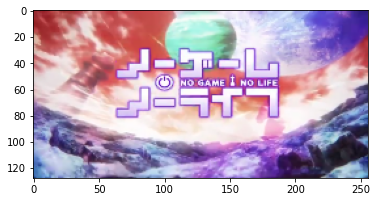

In [82]:
#Read Image
image = cv2.imread("/content/Screenshot_2019-05-09-11-57-08-723_com.mxtech.videoplayer.ad.png")
image = cv2.resize(image,(128*2,64*2))
plt.imshow(image)
plt.show()

In [75]:
#Convert to gray scale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
iarray = np.asarray(gray)
print("Array:\n",iarray)
print("max:\n",np.amax(iarray))
print("min:\n",np.amin(iarray))
print("Avg:\n",np.average(iarray))

Array:
 [[ 55  55  54 ...  60  60  60]
 [ 55  55  58 ...  61  61  61]
 [ 55  55  58 ...  63  63  63]
 ...
 [107 130 132 ... 182 180 163]
 [ 93 126 136 ... 167 146 122]
 [ 54  84 119 ... 121  99  77]]
max:
 255
min:
 18
Avg:
 166.5845947265625


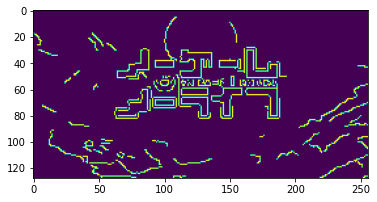



[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255   0   0]]
Avg:
 17.3382568359375


In [76]:
#Detect Edges
edges = cv2.Canny(gray,280,460)  #range of gradients??
plt.imshow(edges)
plt.show()
print("\n")
edarray = np.asarray(edges)
print(edarray)
print("Avg:\n",np.average(edarray))

In [77]:
#Detect lines using Hough transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180,45,np.array([]),2,0.5)   #can't detect vertical edges
#threshold: minimum votes
#minlinelength: minimum length of line
#maxwidth:max dist for same line

###for small image, reduce minlen and maxwidth
print(lines)

[[[ 71  80  73  80]]

 [[145  59 159  59]]

 [[ 97  56 100  57]]

 [[251 101 253 102]]

 [[113  51 128  51]]

 [[114  66 128  66]]

 [[176  59 186  59]]

 [[ 99  68 107  68]]

 [[ 64  46  72  46]]

 [[163  64 179  64]]

 [[ 64  51  70  51]]

 [[ 63  74  71  74]]

 [[185  82 187  82]]

 [[130  43 132  43]]

 [[120  59 122  59]]

 [[113  54 116  54]]

 [[142  38 154  38]]

 [[ 15  34  17  34]]

 [[ 95  68  97  68]]

 [[ 93  72 107  72]]

 [[102  74 106  74]]

 [[211  83 215  83]]

 [[248  42 250  42]]

 [[142  43 156  43]]

 [[176  57 182  56]]

 [[163  59 167  59]]

 [[ 73  52  80  52]]

 [[102  66 104  66]]

 [[228 101 230 101]]

 [[164  51 182  51]]

 [[ 99  38 107  38]]]


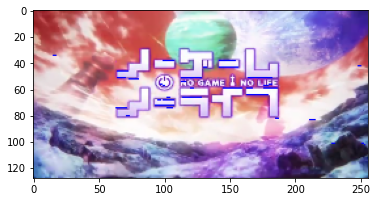

In [83]:
# iterate over the output lines and draw them
for line in lines:
  for x1, y1, x2, y2 in line:
      cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
plt.imshow(image)

# Circle Detection

In [79]:
help(cv2.HoughCircles)

Help on built-in function HoughCircles:

HoughCircles(...)
    HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    .   @brief Finds circles in a grayscale image using the Hough transform.
    .   
    .   The function finds circles in a grayscale image using a modification of the Hough transform.
    .   
    .   Example: :
    .   @include snippets/imgproc_HoughLinesCircles.cpp
    .   
    .   @note Usually the function detects the centers of circles well. However, it may fail to find correct
    .   radii. You can assist to the function by specifying the radius range ( minRadius and maxRadius ) if
    .   you know it. Or, in the case of #HOUGH_GRADIENT method you may set maxRadius to a negative number
    .   to return centers only without radius search, and find the correct radius using an additional procedure.
    .   
    .   It also helps to smooth image a bit unless it's already soft. For example,
    .   GaussianBlur

In [80]:
#read image
image2 = cv2.imread("/content/Screenshot_2019-05-09-11-56-54-319_com.mxtech.videoplayer.ad.png")

In [81]:
#Blurr the image and convert color
image2 = cv2.medianBlur(image2,5)
gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
plt.imshow(gray2)

error: ignored

In [ ]:
# finds the circles in the grayscale image using the Hough transform
circles = cv2.HoughCircles(image=gray2, method=cv2.HOUGH_GRADIENT, dp=1, 
                            minDist=20, param1=150, param2=80, maxRadius=0)

In [ ]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image2,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(image2,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(image2)